Task 4.10 - Part 1B

This script contains the following points:

1. Importing libraries and data 
2. Creating an age-based profile variable & distribution visualization
3. Creating an income-based profile variable & distribution visualization
4. Creating a 'number of dependants' based profile variable & distribution visualization
5. Exporting the final dataframe - version 1
6. Obtaining the max, mean and min values on customer profiles for usage frequency and expenditure

1. Importing libraries and data 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r'C:\Users\polly\Documents\Instacart Basket Analysis'
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_low_excluded.pkl'))  
df_departs = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = 0)  

In [3]:
# Check output of df_ords_prods_all
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependents,fam_status,income,_merge,region,activity_flag
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active customer


In [4]:
# Remove 'activity_flag' and 'merge' columns from dataframe as no longer necessary
df_ords_prods_all = df_ords_prods_all.drop(columns = ['_merge', 'activity_flag'])

In [5]:
# Check output of dataframe
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,fam_status,income,region
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [6]:
# Check statistics of dataframe
df_ords_prods_all.describe()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_days_since_prior_order,age,number_of_dependents,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,30964564.0,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,30964564.0,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.710317e+06,1.029284e+05,1.783414e+01,2.741397e+00,1.341098e+01,NaN,2.559850e+04,8.363038e+00,6.061019e-01,6.450490e+01,9.922365e+00,7.578646e+00,3.442569e+01,1.021500e+01,NaN,4.946803e+01,1.501819e+00,9.967587e+04
std,9.873785e+05,5.947061e+04,1.763442e+01,2.089254e+00,4.248845e+00,0.0,1.408096e+04,7.135399e+00,4.886127e-01,4.841812e+01,6.282441e+00,4.109990e+00,2.489504e+01,7.988674e+01,0.0,1.848528e+01,1.118896e+00,4.314187e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.0,1.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,-1.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554120e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.0,1.354400e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392889e+00,6.0,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.710404e+06,1.025860e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.0,2.528800e+04,6.000000e+00,1.000000e+00,7.900000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825143e+00,7.0,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565206e+06,1.543870e+05,2.500000e+01,5.000000e+00,1.600000e+01,14.0,3.794700e+04,1.100000e+01,1.000000e+00,1.000000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249597e+00,11.0,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,1.270000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.500694e+04,30.0,8.100000e+01,3.000000e+00,5.939010e+05


2. Creating an age-based profile variable & distribution visualization

In [7]:
# Create age_range variable

In [8]:
df_ords_prods_all.loc[df_ords_prods_all['age'] < 35, 'age_range'] = 'Young adult'

In [9]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] >= 35) & (df_ords_prods_all['age'] < 50), 'age_range'] = 'Early middle-age adult' 

In [10]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] >= 50) & (df_ords_prods_all['age'] < 65), 'age_range'] = 'Late middle-age adult' 

In [11]:
df_ords_prods_all.loc[df_ords_prods_all['age'] >= 65, 'age_range'] = 'Older adult'

In [12]:
# Check output
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,fam_status,income,region,age_range
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult


In [13]:
# Check frequency of 'age_range' column
df_ords_prods_all['age_range'].value_counts(dropna = False)

Young adult               8242295
Older adult               8195544
Early middle-age adult    7305994
Late middle-age adult     7220731
Name: age_range, dtype: int64

Text(0.5, 1.0, 'Number of Orders')

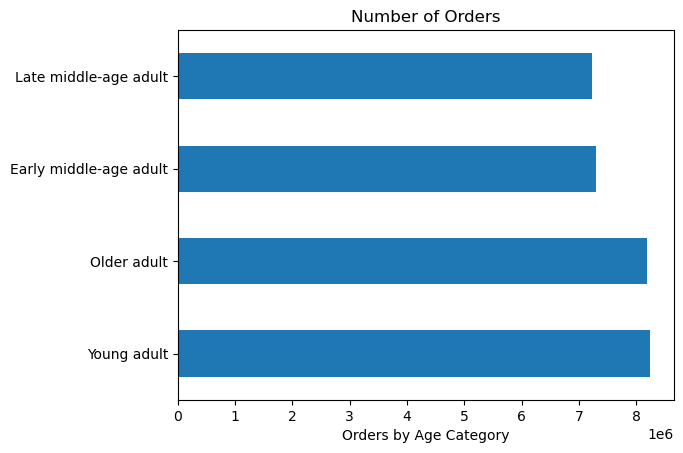

In [14]:
# Create bar chart of 'age_range' column
bar_1 = df_ords_prods_all['age_range'].value_counts().plot.barh()
plt.xlabel('Number of Orders')
plt.title('Orders by Age Category')

In [15]:
# Save 'bar_1' object to file
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_age_range_distribution.png'))

In [16]:
# Remove maximum column display default
pd.options.display.max_columns = None

In [17]:
# Check output
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,fam_status,income,region,age_range
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult


3. Creating an income-based profile variable & distribution visualization

In [18]:
# Create income_range variable

In [19]:
df_ords_prods_all.loc[df_ords_prods_all['income'] < 100000, 'income_range'] = 'Below average income'

In [20]:
df_ords_prods_all.loc[(df_ords_prods_all['income'] >= 100000) & (df_ords_prods_all['income'] < 200000), 'income_range'] = 'Above average income' 

In [21]:
df_ords_prods_all.loc[(df_ords_prods_all['income'] >= 200000) & (df_ords_prods_all['income'] < 300000), 'income_range'] = 'High income' 

In [22]:
df_ords_prods_all.loc[df_ords_prods_all['income'] >= 300000, 'income_range'] = 'Very high income'

In [23]:
# Check output
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,fam_status,income,region,age_range,income_range
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income


In [24]:
# Check frequency of 'income_range' column
df_ords_prods_all['income_range'].value_counts(dropna = False)

Below average income    16757162
Above average income    13953260
High income               154113
Very high income          100029
Name: income_range, dtype: int64

Text(0.5, 1.0, 'Orders by Income Range')

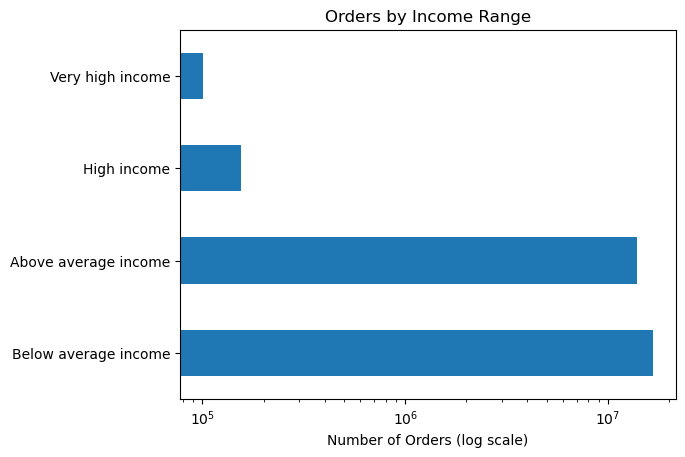

In [25]:
# Create bar chart of 'age_range' column
bar_2 = df_ords_prods_all['income_range'].value_counts().plot.barh(logx = True)
plt.xlabel('Number of Orders (log scale)')
plt.title('Orders by Income Range')


In [26]:
# Save 'bar_2' object to file
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_income_range_distribution.png'))

4. Creating a 'number of dependants' based profile variable & distribution visualization

In [27]:
# Create crosstab between 'fam_status' and 'number_of_dependents' columns
crosstab_fam_dep = pd.crosstab(df_ords_prods_all['fam_status'], df_ords_prods_all['number_of_dependents'], dropna = False)

In [28]:
# Print crosstab
crosstab_fam_dep

number_of_dependents,0,1,2,3
fam_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [29]:
# Create family_size variable

In [30]:
df_ords_prods_all.loc[df_ords_prods_all['number_of_dependents'] < 1, 'family_size'] = 'Single adult'

In [31]:
df_ords_prods_all.loc[(df_ords_prods_all['number_of_dependents'] >= 1) & (df_ords_prods_all['number_of_dependents'] < 2), 'family_size'] = 'Small family' 

In [32]:
df_ords_prods_all.loc[(df_ords_prods_all['number_of_dependents'] >= 2) & (df_ords_prods_all['number_of_dependents'] < 3), 'family_size'] = 'Medium family' 

In [33]:
df_ords_prods_all.loc[df_ords_prods_all['number_of_dependents'] >= 3, 'family_size'] = 'Large family'

In [34]:
# Check output of dataframe
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,fam_status,income,region,age_range,income_range,family_size
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family


In [35]:
# Check frequency of 'family_size' column
df_ords_prods_all['family_size'].value_counts(dropna = False)

Large family     7772516
Single adult     7739681
Medium family    7733261
Small family     7719106
Name: family_size, dtype: int64

Text(0.5, 1.0, 'Orders by Family Size')

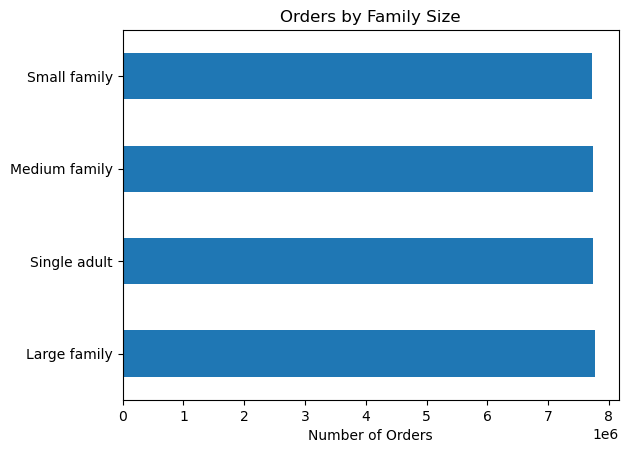

In [36]:
# Create bar chart of 'family_size' column
bar_3 = df_ords_prods_all['family_size'].value_counts().plot.barh()
plt.xlabel('Number of Orders')
plt.title('Orders by Family Size')


In [37]:
# Save 'bar_3' object to file
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_family_size_distribution.png'))

5. Export the final dataframe

In [38]:
# Export df_ords_prods_exclude to 'Prepared Data' folder
df_ords_prods_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_final.pkl'))

6. Obtaining the max, mean and min values on customer profiles for usage frequency and expenditure

In [39]:
# Obtain the max, mean and min values for 'order_number' based on 'age_range'
df_ords_prods_all.groupby('age_range').agg({'order_number': ['mean','min', 'max']})

order_number        
                               mean min max
age_range                                  
Early middle-age adult    17.906860   1  99
Late middle-age adult     17.837133   1  99
Older adult               17.784952   1  99
Young adult               17.815972   1  99

In [40]:
# Obtain the max, mean and min values for 'prices' based on 'age_range'
df_ords_prods_all.groupby('age_range').agg({'prices': ['mean','min', 'max']})

prices           
                            mean  min   max
age_range                                  
Early middle-age adult  7.793604  1.0  25.0
Late middle-age adult   7.786995  1.0  25.0
Older adult             7.796715  1.0  25.0
Young adult             7.784978  1.0  25.0

In [41]:
# Obtain the max, mean and min values for 'order_number' based on 'income_range'
df_ords_prods_all.groupby('income_range').agg({'order_number': ['mean','min', 'max']})

order_number        
                             mean min max
income_range                             
Above average income    17.880497   1  99
Below average income    17.762296   1  99
High income             19.864184   1  99
Very high income        20.275980   1  99

In [42]:
# Obtain the max, mean and min values for 'prices' based on 'income_range'
df_ords_prods_all.groupby('income_range').agg({'prices': ['mean','min', 'max']})

prices           
                          mean  min   max
income_range                             
Above average income  7.956613  1.0  25.0
Below average income  7.652564  1.0  25.0
High income           7.791666  1.0  25.0
Very high income      7.755411  1.0  25.0

In [43]:
# Obtain the max, mean and min values for 'order_number' based on 'family_size'
df_ords_prods_all.groupby('family_size').agg({'order_number': ['mean','min', 'max']})

order_number        
                      mean min max
family_size                       
Large family     17.837412   1  99
Medium family    17.747767   1  99
Single adult     17.957922   1  99
Small family     17.793269   1  99

In [44]:
# Obtain the max, mean and min values for 'prices' based on 'family_size'
df_ords_prods_all.groupby('family_size').agg({'prices': ['mean','min', 'max']})

prices           
                   mean  min   max
family_size                       
Large family   7.792886  1.0  25.0
Medium family  7.784014  1.0  25.0
Single adult   7.789550  1.0  25.0
Small family   7.795910  1.0  25.0